# Библиотеки

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install catboost >> none

In [ ]:
import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from catboost import CatBoostRegressor, CatBoostClassifier

from sklearn.model_selection import *
from sklearn.metrics import *

pd.options.display.float_format = "{:.1f}".format
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight") 

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split

# загрузка датасетов

In [ ]:
df_Union = pd.read_excel("df_Union.xlsx")

In [ ]:
df_pas = pd.read_excel("Пассажиропоток.xlsx")

In [ ]:
df_table = pd.read_excel("Расписание рейсов 05-06.2022 (1).xlsx")

In [ ]:
pd.set_option('display.max_columns', None)

# Данные входные новые

In [ ]:
df_Union.head(3)

,TimeThirty,DAT,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,День недели,TimeThirty2,T,P0,P,U,DD,Ff,WW,W'W',c,VV,Td,Кол-во рейсов вылет,Среднее время ожидания,Среднее время ожидания в часах,Суммарное время ожидания в часах,Суммарное время ожидания,Макс время ожидания,Кол-во рейсов вылет по рассписанию,Среднее время ожидания между прилет и вылет,Среднее время ожидания в часах между прилет и вылет,Суммарное время ожидания в между прилет и вылет,Суммарное время ожидания в часах между прилет и вылет,Макс время ожидания между прилет и вылет
0,2022-05-01 00:00:00.000,2022-05-01,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,755448.0,Вс,2022-05-01,2,749.7,767.3,65,"Ветер, дующий с северо-запада",1,нет,нет,Нет существенной облачности,10.0 и более,-4,583.0,0.1,01:52:26.760000,1900-02-14 12:36:01,45.5,0.3,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-01 00:00:00.000,2022-05-01,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,44560.0,Вс,2022-05-01,2,749.7,767.3,65,"Ветер, дующий с северо-запада",1,нет,нет,Нет существенной облачности,10.0 и более,-4,583.0,0.1,01:52:26.760000,1900-02-14 12:36:01,45.5,0.3,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-01 00:00:00.000,2022-05-01,Торговая точка 8313,538,Общепит,B,Чистая зона ВВЛ-вылет,242160.0,Вс,2022-05-01,2,749.7,767.3,65,"Ветер, дующий с северо-запада",1,нет,нет,Нет существенной облачности,10.0 и более,-4,583.0,0.1,01:52:26.760000,1900-02-14 12:36:01,45.5,0.3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_Union.shape

(24049, 33)

In [ ]:
df_Union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24049 entries, 0 to 24048
Data columns (total 33 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   TimeThirty                                             24049 non-null  object        
 1   DAT                                                    24049 non-null  object        
 2   Торговая точка                                         24049 non-null  object        
 3   Касса                                                  24049 non-null  int64         
 4   orgtype                                                24049 non-null  object        
 5   terminal                                               24049 non-null  object        
 6   tzone                                                  24049 non-null  object        
 7   TotalSumm                                              24049 non-nu

In [ ]:
df_pas.head(3)

,Выход в чз окр дата и время окр вверх,Выход на рейс дата и время окр вниз,Дата рейса,Рейс,Вход в чистую зону,Выход на рейс,Терминал,Авиакомпания,Направление куда летит,Вход в чз дата,Время выхода в чист зону,Выход на рейс дата,Выход на рейс время,Разница входа в чз и выхода на рейс,День недели,Окр вр входа чз вверх,Окр вр входа чз вниз,Выход на рейс время окр вниз
0,2022-04-30 07:00:00.288,2022-05-01 01:00:00,2022-05-01,SU 1512,2022-04-30 06:43:23,2022-05-01 01:17:00,B,SU,SGC,2022-04-30,06:43:23,2022-05-01,01:17:00,18:33:37,ддд,07:00:00,06:30:00,01:00:00
1,2022-04-30 13:00:00.288,2022-05-01 10:30:00,2022-05-01,N4 245,2022-04-30 12:49:49,2022-05-01 10:35:00,B,N4,AER,2022-04-30,12:49:49,2022-05-01,10:35:00,21:45:11,ддд,13:00:00,12:30:00,10:30:00
2,2022-04-30 13:59:59.712,2022-05-01 01:00:00,2022-05-01,SU 1508,2022-04-30 13:39:37,2022-05-01 01:15:00,B,SU,TJM,2022-04-30,13:39:37,2022-05-01,01:15:00,11:35:23,ддд,14:00:00,13:30:00,01:00:00


In [ ]:
df_pas.shape

(145151, 18)

In [ ]:
df_pas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145151 entries, 0 to 145150
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Выход в чз окр дата и время окр вверх  145151 non-null  datetime64[ns]
 1   Выход на рейс дата и время окр вниз    145151 non-null  datetime64[ns]
 2   Дата рейса                             145151 non-null  datetime64[ns]
 3   Рейс                                   145151 non-null  object        
 4   Вход в чистую зону                     145151 non-null  datetime64[ns]
 5   Выход на рейс                          145151 non-null  datetime64[ns]
 6   Терминал                               145151 non-null  object        
 7   Авиакомпания                           145151 non-null  object        
 8   Направление куда летит                 145151 non-null  object        
 9   Вход в чз дата                         145151 no

In [ ]:
df_table.head(3)

,Дата и время призем окр вверх,Дата и время вылета окр вверх,Дата прилёта рейса,Тип Самолёта,АВИАКОМПАНИЯ,Регестрационный номер,Прилёт,Прилёт Рейс,время приземления,код аэропорта прилёт,Вылет,Вылет рейс,время вылета,Код аэропорта вылет,Дата приземления,Время приземления,Дата вылета,Время вылета,Окр вр призем вверх,Окр вр призем вниз,Время вылета окр вверх,Дата и время вылета окр вверх.1,Дата и время призем окр вверх.1,Разница времени приземления и вылета
0,2022-05-01 16:00:00,2022-05-02 06:30:00,2022-05-01,32N,SU,73732.0,INB,SU 1463,2022-05-01 15:41:00,OVB,OUT,SU 1462,2022-05-02 06:21:00,OVB,2022-05-01,15:41:00,2022-05-02,06:21:00,16:00:00,15:30:00,06:30:00,2022-05-02 06:29:59.712,2022-05-01 16:00:00.288,14:40:00
1,2022-05-01 22:30:00,2022-05-02 06:30:00,2022-05-01,32A,SU,73179.0,INB,SU 1249,2022-05-01 22:16:00,REN,OUT,SU 1246,2022-05-02 06:28:00,REN,2022-05-01,22:16:00,2022-05-02,06:28:00,22:30:00,22:00:00,06:30:00,2022-05-02 06:29:59.712,2022-05-01 22:30:00.000,08:12:00
2,2022-05-01 13:30:00,2022-05-01 15:00:00,2022-05-01,SU9,SU,89026.0,INB,SU 1391,2022-05-01 13:27:00,SCW,OUT,SU 1434,2022-05-01 14:57:00,MQF,2022-05-01,13:27:00,2022-05-01,14:57:00,13:30:00,13:00:00,15:00:00,2022-05-01 15:00:00.000,2022-05-01 13:30:00.000,01:30:00


In [ ]:
df_table.shape

(16120, 24)

In [ ]:
df_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16120 entries, 0 to 16119
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Дата и время призем окр вверх         16120 non-null  datetime64[ns]
 1   Дата и время вылета окр вверх         16120 non-null  datetime64[ns]
 2   Дата прилёта рейса                    16120 non-null  datetime64[ns]
 3   Тип Самолёта                          16120 non-null  object        
 4   АВИАКОМПАНИЯ                          16120 non-null  object        
 5   Регестрационный номер                 16120 non-null  object        
 6   Прилёт                                16120 non-null  object        
 7   Прилёт Рейс                           16120 non-null  object        
 8   время приземления                     16120 non-null  datetime64[ns]
 9   код аэропорта прилёт                  16120 non-null  object        
 10

# Анализ

In [ ]:
df_Union.head(3)

,TimeThirty,DAT,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,День недели,TimeThirty2,T,P0,P,U,DD,Ff,WW,W'W',c,VV,Td,Кол-во рейсов вылет,Среднее время ожидания,Среднее время ожидания в часах,Суммарное время ожидания в часах,Суммарное время ожидания,Макс время ожидания,Кол-во рейсов вылет по рассписанию,Среднее время ожидания между прилет и вылет,Среднее время ожидания в часах между прилет и вылет,Суммарное время ожидания в между прилет и вылет,Суммарное время ожидания в часах между прилет и вылет,Макс время ожидания между прилет и вылет
0,2022-05-01 00:00:00.000,2022-05-01,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,755448.0,Вс,2022-05-01,2,749.7,767.3,65,"Ветер, дующий с северо-запада",1,нет,нет,Нет существенной облачности,10.0 и более,-4,583.0,0.1,01:52:26.760000,1900-02-14 12:36:01,45.5,0.3,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-01 00:00:00.000,2022-05-01,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,44560.0,Вс,2022-05-01,2,749.7,767.3,65,"Ветер, дующий с северо-запада",1,нет,нет,Нет существенной облачности,10.0 и более,-4,583.0,0.1,01:52:26.760000,1900-02-14 12:36:01,45.5,0.3,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-01 00:00:00.000,2022-05-01,Торговая точка 8313,538,Общепит,B,Чистая зона ВВЛ-вылет,242160.0,Вс,2022-05-01,2,749.7,767.3,65,"Ветер, дующий с северо-запада",1,нет,нет,Нет существенной облачности,10.0 и более,-4,583.0,0.1,01:52:26.760000,1900-02-14 12:36:01,45.5,0.3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f"Данные лежат в следующем промежутке времени: от {df_Union['TimeThirty2'].min()} до {df_Union['TimeThirty2'].max()}")

Данные лежат в следующем промежутке времени: от 2022-05-01 00:00:00 до 2022-06-30 23:30:00


In [ ]:
(df_Union["TotalSumm"]/60).describe(percentiles=np.linspace(0.1, 0.999, 10))

count     24049.0
mean      12892.1
std       18930.2
min           6.7
10%         861.3
19.99%     1660.0
29.98%     2732.1
39.97%     4137.6
49.96%     5995.1
50%        6000.0
59.94%     8445.3
69.93%    12078.1
79.92%    19559.6
89.91%    32812.1
99.9%    154822.2
max      212613.3
Name: TotalSumm, dtype: float64

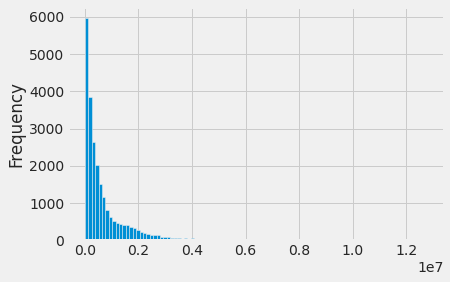

In [ ]:
TotalSumm = df_Union["TotalSumm"]
TotalSumm.plot.hist(bins=100);

In [ ]:
th = np.percentile(df_Union["TotalSumm"], 99.5)
th

6812153.599999995

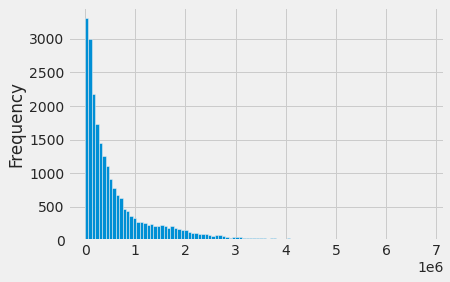

In [ ]:
TotalSumm = df_Union.loc[df_Union["TotalSumm"]<th, "TotalSumm"]
TotalSumm.plot.hist(bins=100);

In [ ]:
df = df_Union.copy()

In [ ]:
df["day_of_week"] = df["TimeThirty2"].dt.day_of_week
df["hour"] = df["TimeThirty2"].dt.hour
df["month"] = df["TimeThirty2"].dt.month
df["day_of_year"] = df["TimeThirty2"].dt.date

Зависимость продаж от часа

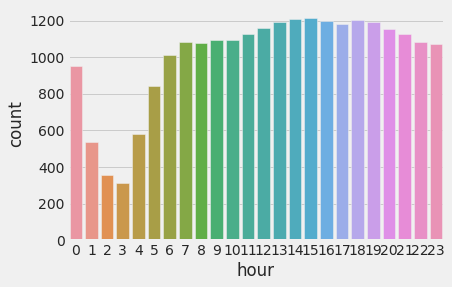

In [ ]:
sns.countplot(data=df, x="hour");

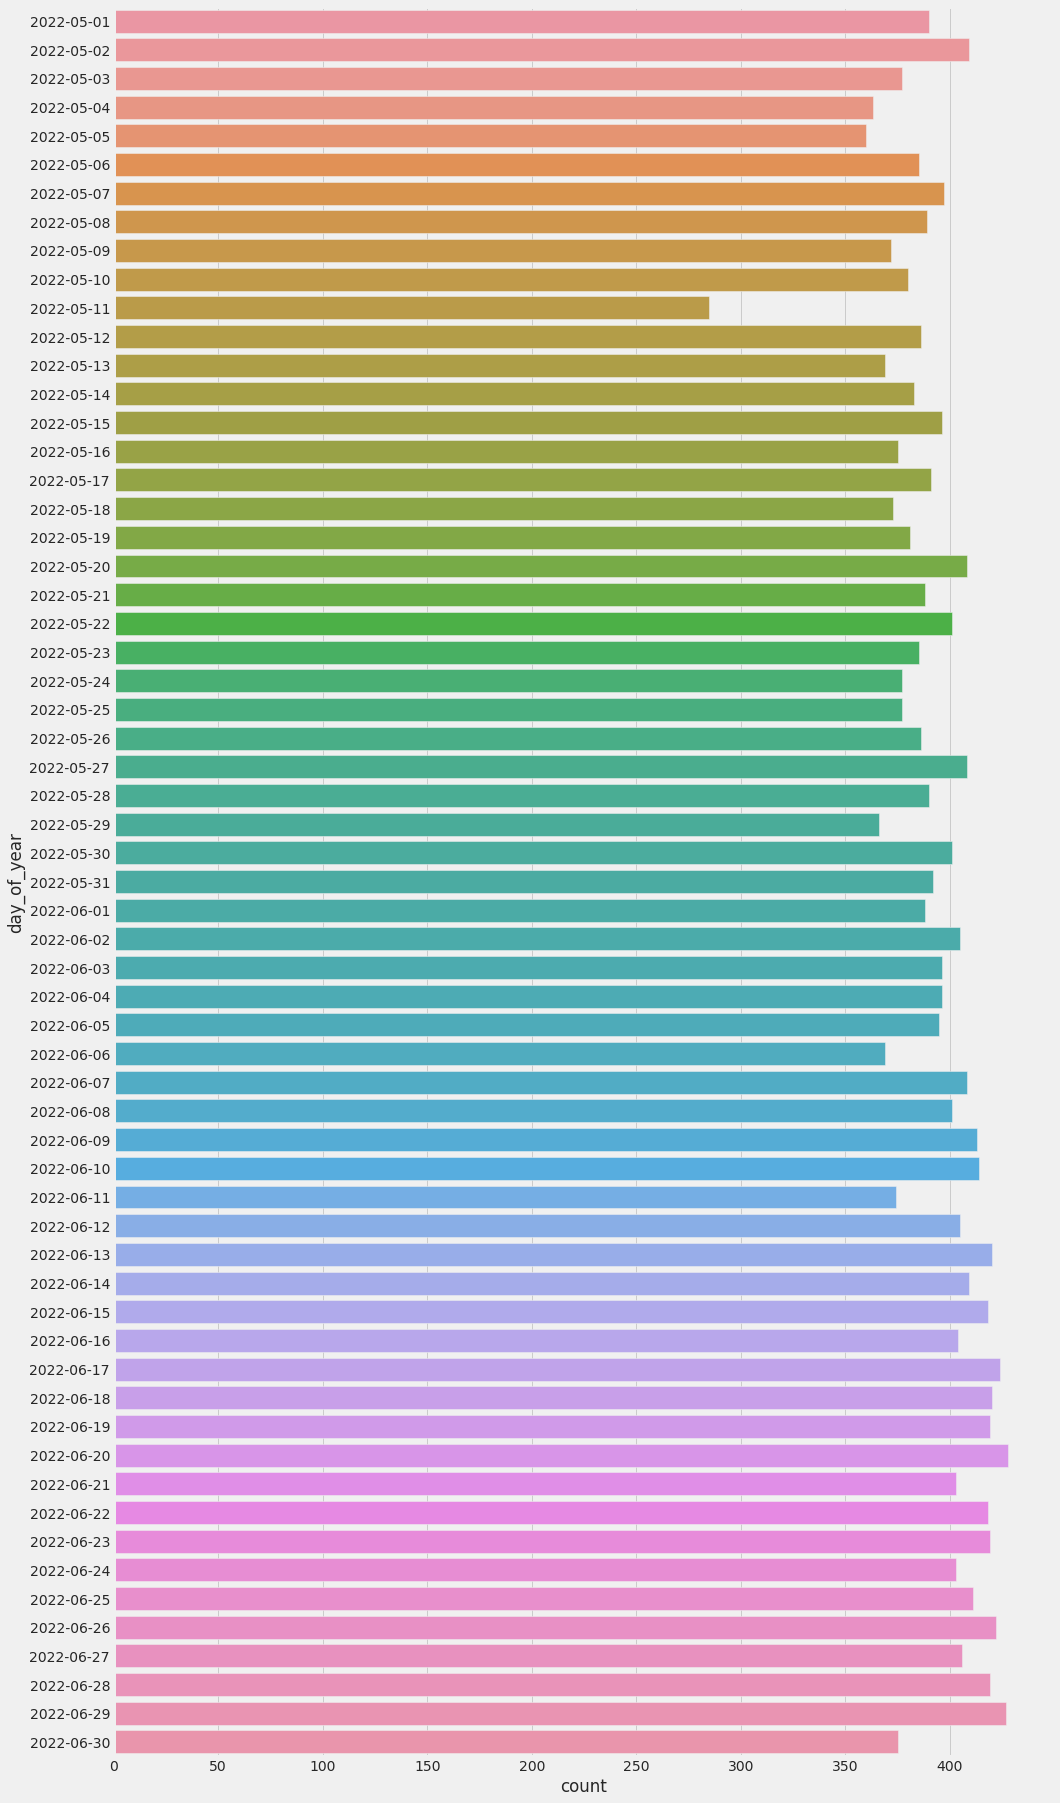

In [ ]:
plt.figure(figsize=(15,30))
sns.countplot(data=df.sort_values(by='day_of_year'), y='day_of_year'); 

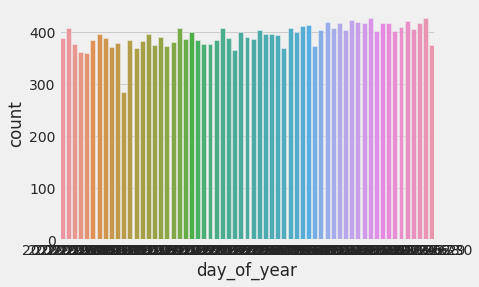

In [ ]:
sns.countplot(data=df, x="day_of_year");

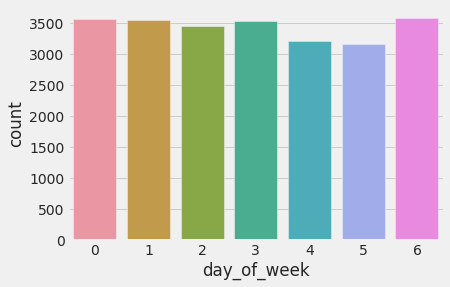

In [ ]:
sns.countplot(data=df, x="day_of_week");

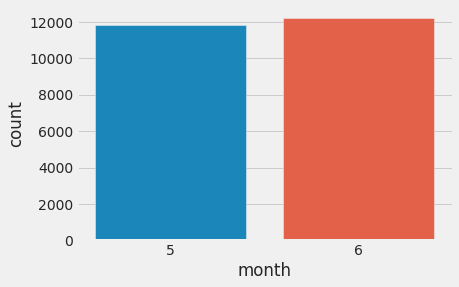

In [ ]:
sns.countplot(data=df, x="month");

# Models catboost

In [ ]:
df_Union.isnull().sum()

TimeThirty                                                   0
DAT                                                          0
Торговая точка                                               0
Касса                                                        0
orgtype                                                      0
terminal                                                     0
tzone                                                        0
TotalSumm                                                    0
День недели                                                  0
TimeThirty2                                                  0
T                                                            0
P0                                                           0
P                                                            0
U                                                            0
DD                                                           0
Ff                                                     

## удаление и пустоты

In [ ]:
df = df.fillna(0)

In [ ]:
# df.fillna(df.mean())

In [ ]:
df = df.drop(['TimeThirty', 'DAT'], axis = 1)

In [ ]:
df = df.drop(['Суммарное время ожидания в часах', 'Суммарное время ожидания в часах между прилет и вылет'], axis = 1)

In [ ]:
df = df.drop(['Среднее время ожидания в часах между прилет и вылет'], axis = 1)

In [ ]:
df = df.drop(['Среднее время ожидания в часах'], axis = 1)

In [ ]:
df = df.drop(['День недели'], axis = 1)

In [ ]:
df = df.drop(['day_of_year'], axis = 1)

In [ ]:
df = df.drop(['month'], axis = 1)

In [ ]:
df.columns

Index(['Торговая точка', 'Касса', 'orgtype', 'terminal', 'tzone', 'TotalSumm',
       'TimeThirty2', 'T', 'P0', 'P', 'U', 'DD', 'Ff', 'WW', 'W'W'', 'c', 'VV',
       'Td', 'Кол-во рейсов вылет', 'Среднее время ожидания',
       'Суммарное время ожидания', 'Макс время ожидания',
       'Кол-во рейсов вылет по рассписанию',
       'Среднее время ожидания между прилет и вылет',
       'Суммарное время ожидания в  между прилет и вылет',
       'Макс время ожидания между прилет и вылет', 'day_of_week', 'hour'],
      dtype='object')

In [ ]:
df.head(3)

,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,TimeThirty2,T,P0,P,U,DD,Ff,WW,W'W',c,VV,Td,Кол-во рейсов вылет,Среднее время ожидания,Суммарное время ожидания,Макс время ожидания,Кол-во рейсов вылет по рассписанию,Среднее время ожидания между прилет и вылет,Суммарное время ожидания в между прилет и вылет,Макс время ожидания между прилет и вылет,day_of_week,hour
0,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,755448.0,2022-05-01,2,749.7,767.3,65,"Ветер, дующий с северо-запада",1,нет,нет,Нет существенной облачности,10.0 и более,-4,583.0,0.1,45.5,0.3,0.0,0.0,0.0,0.0,6,0
1,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,44560.0,2022-05-01,2,749.7,767.3,65,"Ветер, дующий с северо-запада",1,нет,нет,Нет существенной облачности,10.0 и более,-4,583.0,0.1,45.5,0.3,0.0,0.0,0.0,0.0,6,0
2,Торговая точка 8313,538,Общепит,B,Чистая зона ВВЛ-вылет,242160.0,2022-05-01,2,749.7,767.3,65,"Ветер, дующий с северо-запада",1,нет,нет,Нет существенной облачности,10.0 и более,-4,583.0,0.1,45.5,0.3,0.0,0.0,0.0,0.0,6,0


In [ ]:
df['hour'] = df['hour'].astype(str)

In [ ]:
df['day_of_week'] = df['day_of_week'].astype(str)

In [ ]:
df['Касса'] = df['Касса'].astype(str)

In [ ]:
cat_features = ['Торговая точка', 'Касса', 'orgtype', 'terminal', 'tzone', 'DD', 'WW', "W'W'", 'c', 'VV', 'day_of_week', 'hour']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24049 entries, 0 to 24048
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Торговая точка                                    24049 non-null  object        
 1   Касса                                             24049 non-null  object        
 2   orgtype                                           24049 non-null  object        
 3   terminal                                          24049 non-null  object        
 4   tzone                                             24049 non-null  object        
 5   TotalSumm                                         24049 non-null  float64       
 6   TimeThirty2                                       24049 non-null  datetime64[ns]
 7   T                                                 24049 non-null  int64         
 8   P0                        

In [ ]:
df.columns

Index(['Торговая точка', 'Касса', 'orgtype', 'terminal', 'tzone', 'TotalSumm',
       'TimeThirty2', 'T', 'P0', 'P', 'U', 'DD', 'Ff', 'WW', 'W'W'', 'c', 'VV',
       'Td', 'Кол-во рейсов вылет', 'Среднее время ожидания',
       'Суммарное время ожидания', 'Макс время ожидания',
       'Кол-во рейсов вылет по рассписанию',
       'Среднее время ожидания между прилет и вылет',
       'Суммарное время ожидания в  между прилет и вылет',
       'Макс время ожидания между прилет и вылет', 'day_of_week', 'hour'],
      dtype='object')

In [ ]:
cat_columns = df.select_dtypes(include=['object']).columns
cat_columns

Index(['Торговая точка', 'Касса', 'orgtype', 'terminal', 'tzone', 'DD', 'WW',
       'W'W'', 'c', 'VV', 'day_of_week', 'hour'],
      dtype='object')

In [ ]:
df[['Торговая точка', 'Касса', 'orgtype', 'terminal', 'tzone', 'DD', 'WW', "W'W'", 'c', 'VV', 'day_of_week', 'hour']] = df[['Торговая точка', 'Касса', 'orgtype', 'terminal', 'tzone', 'DD', 'WW', "W'W'", 'c', 'VV', 'day_of_week', 'hour']].astype('category')

In [ ]:
df[ 'VV' ] = df[ 'VV' ].cat.codes

In [ ]:
# df[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
df.head(3)

,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,TimeThirty2,T,P0,P,U,DD,Ff,WW,W'W',c,VV,Td,Кол-во рейсов вылет,Среднее время ожидания,Суммарное время ожидания,Макс время ожидания,Кол-во рейсов вылет по рассписанию,Среднее время ожидания между прилет и вылет,Суммарное время ожидания в между прилет и вылет,Макс время ожидания между прилет и вылет,day_of_week,hour
0,Торговая точка 0601,7683,Общепит,B,Чистая зона ВВЛ-вылет,755448.0,2022-05-01,2,749.7,767.3,65,"Ветер, дующий с северо-запада",1,нет,нет,Нет существенной облачности,18,-4,583.0,0.1,45.5,0.3,0.0,0.0,0.0,0.0,6,0
1,Торговая точка 8313,2251,Общепит,B,Чистая зона ВВЛ-вылет,44560.0,2022-05-01,2,749.7,767.3,65,"Ветер, дующий с северо-запада",1,нет,нет,Нет существенной облачности,18,-4,583.0,0.1,45.5,0.3,0.0,0.0,0.0,0.0,6,0
2,Торговая точка 8313,538,Общепит,B,Чистая зона ВВЛ-вылет,242160.0,2022-05-01,2,749.7,767.3,65,"Ветер, дующий с северо-запада",1,нет,нет,Нет существенной облачности,18,-4,583.0,0.1,45.5,0.3,0.0,0.0,0.0,0.0,6,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24049 entries, 0 to 24048
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Торговая точка                                    24049 non-null  category      
 1   Касса                                             24049 non-null  category      
 2   orgtype                                           24049 non-null  category      
 3   terminal                                          24049 non-null  category      
 4   tzone                                             24049 non-null  category      
 5   TotalSumm                                         24049 non-null  float64       
 6   TimeThirty2                                       24049 non-null  datetime64[ns]
 7   T                                                 24049 non-null  int64         
 8   P0                        

In [ ]:
df_train = df[df['TimeThirty2']<'2022-06-01']

In [ ]:
df_test = df[df['TimeThirty2']>='2022-06-01']

### Преобразованиие данных в X и y

In [ ]:
X = df_train.drop(['TotalSumm', 'TimeThirty2'], axis=1)
y_regression = df_train['TotalSumm']

cat_features = ['Торговая точка', 'Касса', 'orgtype', 'terminal', 'tzone', 'DD', 'WW', "W'W'", 'c', 'VV', 'day_of_week', 'hour']

X_test = df_test.drop(['TotalSumm', 'TimeThirty2'], axis=1)
y_test_regression = df_test['TotalSumm']

## Обучение и тестирование моделей

### Подход №1: Регрессия

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y_regression, test_size=0.2, random_state=42)

In [ ]:
model_regression = CatBoostRegressor(
    verbose=100,
    cat_features=cat_features
)

model_regression.fit(X_train, y_train, eval_set=(X_val, y_val))

Learning rate set to 0.072476
0:	learn: 1029105.6516131	test: 1043368.7649673	best: 1043368.7649673 (0)	total: 74.2ms	remaining: 1m 14s
100:	learn: 585739.8271864	test: 614038.1974732	best: 614038.1974732 (100)	total: 2.06s	remaining: 18.3s
200:	learn: 558472.1871963	test: 610948.0183146	best: 610081.1961396 (186)	total: 7.24s	remaining: 28.8s
300:	learn: 537028.9272000	test: 612223.4631136	best: 610081.1961396 (186)	total: 12.5s	remaining: 29.1s
400:	learn: 514618.7337993	test: 612727.6022321	best: 610081.1961396 (186)	total: 17.3s	remaining: 25.9s
500:	learn: 494538.2860565	test: 615573.4777953	best: 610081.1961396 (186)	total: 20s	remaining: 19.9s
600:	learn: 477082.6058939	test: 616038.1278564	best: 610081.1961396 (186)	total: 24.1s	remaining: 16s
700:	learn: 462204.0411363	test: 617674.7894993	best: 610081.1961396 (186)	total: 27.6s	remaining: 11.8s
800:	learn: 448133.1976167	test: 618709.5107850	best: 610081.1961396 (186)	total: 30.8s	remaining: 7.65s
900:	learn: 434144.3578000	t

In [ ]:
preds_test_regression = model_regression.predict(X_test[model_regression.feature_names_])

In [ ]:
# print('Test MAE:', mean_absolute_error(y_test_regression, preds_test_regression))

Test MAE: 356668.2559713678


In [ ]:
print('Test MAE:', mean_absolute_error(y_test_regression, preds_test_regression))

Test MAE: 353270.0749009358


## Предсказание

In [ ]:
df_test['pred'] = preds_test_regression

In [ ]:
df_test.head(3)

,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,TimeThirty2,T,P0,P,U,DD,Ff,WW,W'W',c,VV,Td,Кол-во рейсов вылет,Среднее время ожидания,Суммарное время ожидания,Макс время ожидания,Кол-во рейсов вылет по рассписанию,Среднее время ожидания между прилет и вылет,Суммарное время ожидания в между прилет и вылет,Макс время ожидания между прилет и вылет,day_of_week,hour,pred
11840,Торговая точка 3726,5944,Общепит,B,Чистая зона ВВЛ-вылет,500000.0,2022-06-01,14,749.0,765.8,94,"Ветер, дующий с востока",2,нет,нет,"Рассеянная (40-50%) 180 м, сплошная (100%) 780 м",18,13,997.0,0.1,78.9,0.3,8.0,0.2,2.0,0.8,2,0,548328.3
11841,Торговая точка 8998,9887,Торговля,B,Чистая зона ВВЛ-вылет,88080.0,2022-06-01,14,749.0,765.8,94,"Ветер, дующий с востока",2,нет,нет,"Рассеянная (40-50%) 180 м, сплошная (100%) 780 м",18,13,997.0,0.1,78.9,0.3,8.0,0.2,2.0,0.8,2,0,174736.5
11842,Торговая точка 8313,538,Общепит,B,Чистая зона ВВЛ-вылет,303360.0,2022-06-01,14,749.0,765.8,94,"Ветер, дующий с востока",2,нет,нет,"Рассеянная (40-50%) 180 м, сплошная (100%) 780 м",18,13,997.0,0.1,78.9,0.3,8.0,0.2,2.0,0.8,2,0,321691.6


In [ ]:
df_test.to_csv('pred.csv', sep=';', index=None)

In [ ]:
df_test.to_excel("pred.xlsx")

# feature_importance

Text(0.5, 1.0, 'Feature Importance')

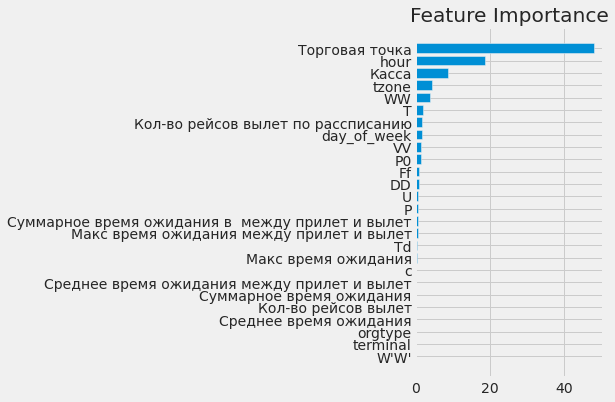

In [ ]:
feature_importance = model_regression.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(3, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

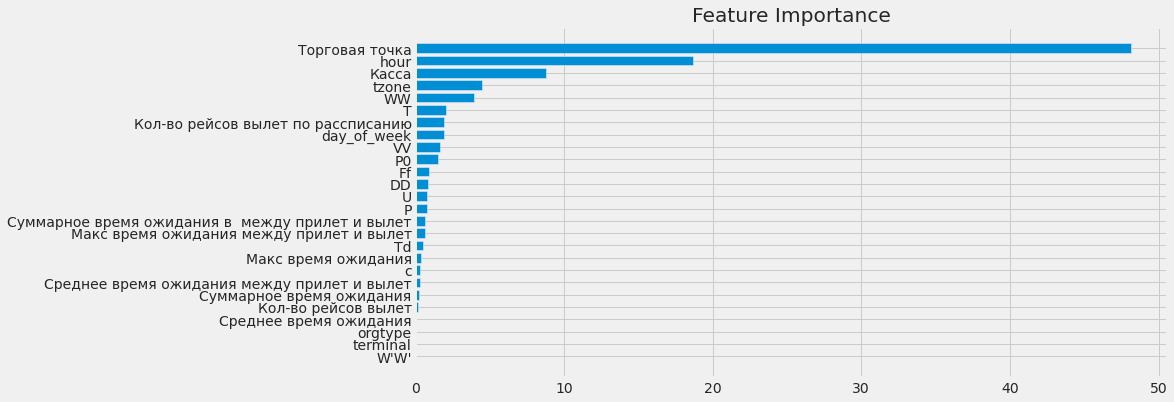

In [ ]:
feature_importance = model_regression.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

# Gradient Boosting lightgbm

In [ ]:
df[['Торговая точка', 'Касса', 'orgtype', 'terminal', 'tzone', 'DD', 'WW', "W'W'", 'c', 'VV', 'day_of_week', 'hour']] = df[['Торговая точка', 'Касса', 'orgtype', 'terminal', 'tzone', 'DD', 'WW', "W'W'", 'c', 'VV', 'day_of_week', 'hour']].astype('category')

In [ ]:
df[ 'VV' ] = df[ 'VV' ].cat.codes

In [ ]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['Торговая точка', 'Касса', 'orgtype', 'terminal', 'tzone', 'DD', 'WW',
       'W'W'', 'c', 'day_of_week', 'hour'],
      dtype='object')

In [ ]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
df.head(3)

,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,TimeThirty2,T,P0,P,U,DD,Ff,WW,W'W',c,VV,Td,Кол-во рейсов вылет,Среднее время ожидания,Суммарное время ожидания,Макс время ожидания,Кол-во рейсов вылет по рассписанию,Среднее время ожидания между прилет и вылет,Суммарное время ожидания в между прилет и вылет,Макс время ожидания между прилет и вылет,day_of_week,hour
0,0,8,0,0,1,755448.0,2022-05-01,2,749.7,767.3,65,8,1,8,2,53,18,-4,583.0,0.1,45.5,0.3,0.0,0.0,0.0,0.0,6,0
1,6,1,0,0,1,44560.0,2022-05-01,2,749.7,767.3,65,8,1,8,2,53,18,-4,583.0,0.1,45.5,0.3,0.0,0.0,0.0,0.0,6,0
2,6,5,0,0,1,242160.0,2022-05-01,2,749.7,767.3,65,8,1,8,2,53,18,-4,583.0,0.1,45.5,0.3,0.0,0.0,0.0,0.0,6,0


In [ ]:
params = {
    "task":"train", 
    "boosting":"gbdt", 
    "objective":"regression", 
    "num_leaves":8, 
    "n_estimators":1000,
    "learning_rate":0.03, 
    "metric": {"l2"}, 
    "verbose": -1
}

In [ ]:
df_train = df[df['TimeThirty2']<'2022-06-01']

In [ ]:
df_test = df[df['TimeThirty2']>='2022-06-01']

In [ ]:
X = df_train.drop(['TotalSumm', 'TimeThirty2'], axis=1)
y = df_train['TotalSumm']

X_test = df_test.drop(['TotalSumm', 'TimeThirty2'], axis=1)
y_test = df_test['TotalSumm']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=17)

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [ ]:
model = lgb.train(params, 
                  train_set=lgb_train, 
                  valid_sets=lgb_eval,
                  early_stopping_rounds=30)

In [ ]:
y_pred = model.predict(X_test)
print("RMSLE: ", mean_squared_error(y_test, y_pred)**0.5)

RMSLE:  670628.5318073075


In [ ]:
print('Test MAE:', mean_absolute_error(y_test, y_pred))

Test MAE: 364537.8215109858


## Output Analysis

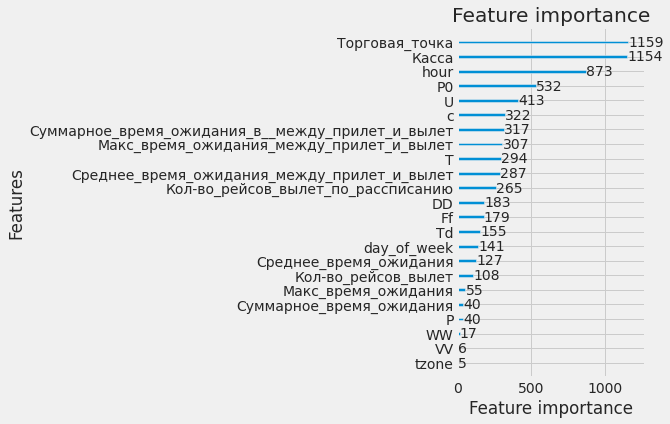

In [ ]:
fig, ax = plt.subplots(figsize=(3, 6))
lgb.plot_importance(model, ax=ax)

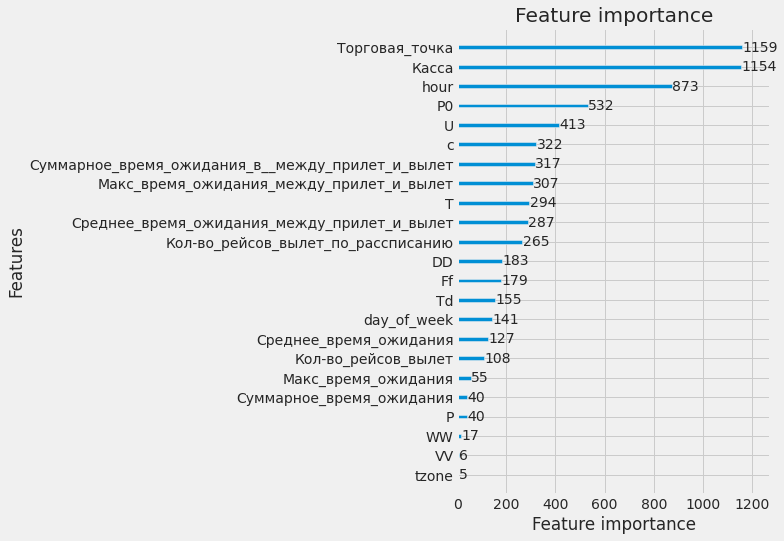

In [ ]:
fig, ax = plt.subplots(figsize=(5, 8))
lgb.plot_importance(model, ax=ax)

In [ ]:
# lgb.plot_importance(model, height=1);

## Предсказание

In [ ]:
df_test['pred'] = y_pred

In [ ]:
df_test.head(3)

,Торговая точка,Касса,orgtype,terminal,tzone,TotalSumm,TimeThirty2,T,P0,P,U,DD,Ff,WW,W'W',c,VV,Td,Кол-во рейсов вылет,Среднее время ожидания,Суммарное время ожидания,Макс время ожидания,Кол-во рейсов вылет по рассписанию,Среднее время ожидания между прилет и вылет,Суммарное время ожидания в между прилет и вылет,Макс время ожидания между прилет и вылет,day_of_week,hour,pred
11840,3,6,0,0,1,500000.0,2022-06-01,14,749.0,765.8,94,0,2,8,2,202,18,13,997.0,0.1,78.9,0.3,8.0,0.2,2.0,0.8,2,0,559745.6
11841,7,11,1,0,1,88080.0,2022-06-01,14,749.0,765.8,94,0,2,8,2,202,18,13,997.0,0.1,78.9,0.3,8.0,0.2,2.0,0.8,2,0,38705.1
11842,6,5,0,0,1,303360.0,2022-06-01,14,749.0,765.8,94,0,2,8,2,202,18,13,997.0,0.1,78.9,0.3,8.0,0.2,2.0,0.8,2,0,172819.1


In [ ]:
df_test.to_csv('pred_lgb.csv', sep=';', index=None)

In [ ]:
df_test.to_excel("pred_lgb.xlsx")